In [75]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
data = pd.read_csv('data_vaksin.csv', encoding='latin-1' )

In [77]:
data

,data,nilai
0,vaksin jalan vaksinasi tahap giat vaksinasi la...,1
1,vaksinasi ilegal bayar rupiah vaksin covid ora...,2
2,abk positif covid varian india perintah priori...,1
3,pelihara vaksin rabies perintah alam,1
4,vaksin lambat target alas utama niscaya wacana...,2
...,...,...
5001,vaksin sehat tumbuh ekonomi pandemi iring tang...,1
5002,vaksin sehat tumbuh ekonomi pandemi iring tang...,1
5003,vaksin sehat vaksinasi massal atlet dukung pem...,1
5004,vaksin sehat yess pemerintah kembang digital t...,1


In [78]:
data.describe()

,nilai
count,5006.000000
mean,1.185378
std,0.388642
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [79]:
data.isna().sum()

data     0
nilai    0
dtype: int64

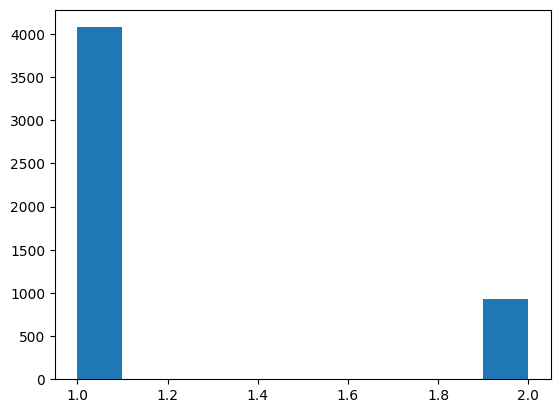

In [80]:
plt.hist(data.nilai)
plt.show()

In [81]:
data.nilai.value_counts()

1    4078
2     928
Name: nilai, dtype: int64

In [82]:
df = data[['data','nilai']]
df.head()

,data,nilai
0,vaksin jalan vaksinasi tahap giat vaksinasi la...,1
1,vaksinasi ilegal bayar rupiah vaksin covid ora...,2
2,abk positif covid varian india perintah priori...,1
3,pelihara vaksin rabies perintah alam,1
4,vaksin lambat target alas utama niscaya wacana...,2


In [83]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['data'],df['nilai'],test_size=0.2, random_state=0)

In [84]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [85]:
Test_Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

<h1>TF-IDF</h1>

In [86]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(df['data'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [87]:
Train_X_Tfidf.shape

(4004, 6612)

In [88]:
Train_Y.shape

(4004,)

In [89]:
print("TF-IDF ", type(Test_X_Tfidf), Train_X_Tfidf.shape)

TF-IDF  <class 'scipy.sparse._csr.csr_matrix'> (4004, 6612)


In [90]:
SVM = SVC()
cross_val_score(SVM,Train_X_Tfidf,Train_Y, cv=10)

array([0.84538653, 0.8553616 , 0.85037406, 0.86284289, 0.88      ,
       0.87      , 0.8425    , 0.8575    , 0.87      , 0.8525    ])

In [91]:
cross_val_score(SVM,Train_X_Tfidf,Train_Y, cv=10).mean()

0.8586465087281795

<h1>Membandingkan Kernel</h1>
<h2>1.Linear</h2>

In [92]:
clf = SVC(kernel='linear', C=2.33)
clf.fit(Train_X_Tfidf,Train_Y)

SVC(C=2.33, kernel='linear')

In [93]:
scores = cross_val_score(clf, Train_X_Tfidf, Train_Y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(clf,Train_X_Tfidf,Train_Y, cv=10).mean())

[0.88029925 0.88279302 0.87531172 0.88528678 0.895      0.8875
 0.8525     0.88       0.8525     0.8525    ]
K-Fold Mean ->  0.8743690773067332


In [94]:
y_pred = clf.predict(Test_X_Tfidf)

In [95]:
print(confusion_matrix(Test_Y, y_pred))
print("SVM Accuracy Score -> ",accuracy_score(y_pred, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(y_pred, Test_Y)*100)
print("SVM Precision Score -> ",precision_score(y_pred, Test_Y)*100)
print("SVM f1 Score -> ",f1_score(y_pred, Test_Y)*100)

[[754  42]
 [ 91 115]]
SVM Accuracy Score ->  86.72654690618764
SVM Recall Score ->  73.24840764331209
SVM Precision Score ->  55.8252427184466
SVM f1 Score ->  63.36088154269971


<h2>2.Polynomial</h2>

In [96]:
poly = SVC(kernel='poly', C=2.33)
poly.fit(Train_X_Tfidf,Train_Y)

SVC(C=2.33, kernel='poly')

In [97]:
scores = cross_val_score(poly, Train_X_Tfidf, Train_Y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(poly,Train_X_Tfidf,Train_Y, cv=10).mean())

[0.83790524 0.85037406 0.83291771 0.86284289 0.8525     0.8625
 0.855      0.85       0.8625     0.8425    ]
K-Fold Mean ->  0.8509039900249377


In [98]:
y_pred = poly.predict(Test_X_Tfidf)

In [99]:
print(confusion_matrix(Test_Y, y_pred))
print("SVM Accuracy Score -> ",accuracy_score(y_pred, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(y_pred, Test_Y)*100)
print("SVM Precision Score -> ",precision_score(y_pred, Test_Y)*100)
print("SVM f1 Score -> ",f1_score(y_pred, Test_Y)*100)

[[786  10]
 [153  53]]
SVM Accuracy Score ->  83.73253493013972
SVM Recall Score ->  84.12698412698413
SVM Precision Score ->  25.728155339805824
SVM f1 Score ->  39.405204460966544


<h2>3.Radial Basis Function</h2>

In [100]:
rbf = SVC(kernel='rbf', C=2.13, gamma=0.50 ).fit(Train_X_Tfidf,Train_Y)


In [101]:
scores = cross_val_score(rbf, Train_X_Tfidf, Train_Y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(rbf,Train_X_Tfidf,Train_Y, cv=10).mean())

[0.87281796 0.88029925 0.87281796 0.88279302 0.89       0.88
 0.875      0.875      0.8775     0.8675    ]
K-Fold Mean ->  0.8773728179551121


In [102]:
y_pred = rbf.predict(Test_X_Tfidf)

In [103]:
print(confusion_matrix(Test_Y, y_pred))
print("SVM Accuracy Score -> ",accuracy_score(y_pred, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(y_pred, Test_Y)*100)
print("SVM Precision Score -> ",precision_score(y_pred, Test_Y)*100)
print("SVM f1 Score -> ",f1_score(y_pred, Test_Y)*100)

[[772  24]
 [101 105]]
SVM Accuracy Score ->  87.5249500998004
SVM Recall Score ->  81.3953488372093
SVM Precision Score ->  50.970873786407765
SVM f1 Score ->  62.686567164179095


<h2>4.Sigmoid</h2>

In [104]:
sig = SVC(kernel='sigmoid', C=2.25)
sig.fit(Train_X_Tfidf,Train_Y)

SVC(C=2.25, kernel='sigmoid')

In [105]:
scores = cross_val_score(sig, Train_X_Tfidf, Train_Y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(sig,Train_X_Tfidf,Train_Y, cv=10).mean())

[0.87531172 0.88279302 0.86284289 0.86533666 0.895      0.8675
 0.855      0.88       0.86       0.8525    ]
K-Fold Mean ->  0.8696284289276808


In [106]:
y_pred = sig.predict(Test_X_Tfidf)

In [107]:
print(confusion_matrix(Test_Y, y_pred))
print("SVM Accuracy Score -> ",accuracy_score(y_pred, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(y_pred, Test_Y)*100)
print("SVM Precision Score -> ",precision_score(y_pred, Test_Y)*100)
print("SVM f1 Score -> ",f1_score(y_pred, Test_Y)*100)

[[755  41]
 [107  99]]
SVM Accuracy Score ->  85.22954091816366
SVM Recall Score ->  70.71428571428572
SVM Precision Score ->  48.05825242718447
SVM f1 Score ->  57.22543352601156


In [108]:
def classify(tweet):
    pred  = rbf.predict(Tfidf_vect.transform([tweet]))
    if pred == 1:
        return "Sentimen negatif"
    return "Sentimen positif"

In [109]:
classify('vaksin haram jangan mau')

'Sentimen negatif'

In [110]:
classify('ayo dukung vaksin pemerintah')

'Sentimen positif'

In [111]:
pickle.dump(rbf, open('iris.pkl', 'wb'))
pickle.dump(Tfidf_vect, open('vect.pkl', 'wb'))